In [1]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv')   

dataset.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [2]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (1500, 9)

Columns in DataFrame:  ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']

Data types of columns:
 Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5  

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'NumberOfPurchases'}>,
        <Axes: title={'center': 'ProductCategory'}>,
        <Axes: title={'center': 'TimeSpentOnWebsite'}>],
       [<Axes: title={'center': 'LoyaltyProgram'}>,
        <Axes: title={'center': 'DiscountsAvailed'}>,
        <Axes: title={'center': 'PurchaseStatus'}>]], dtype=object)

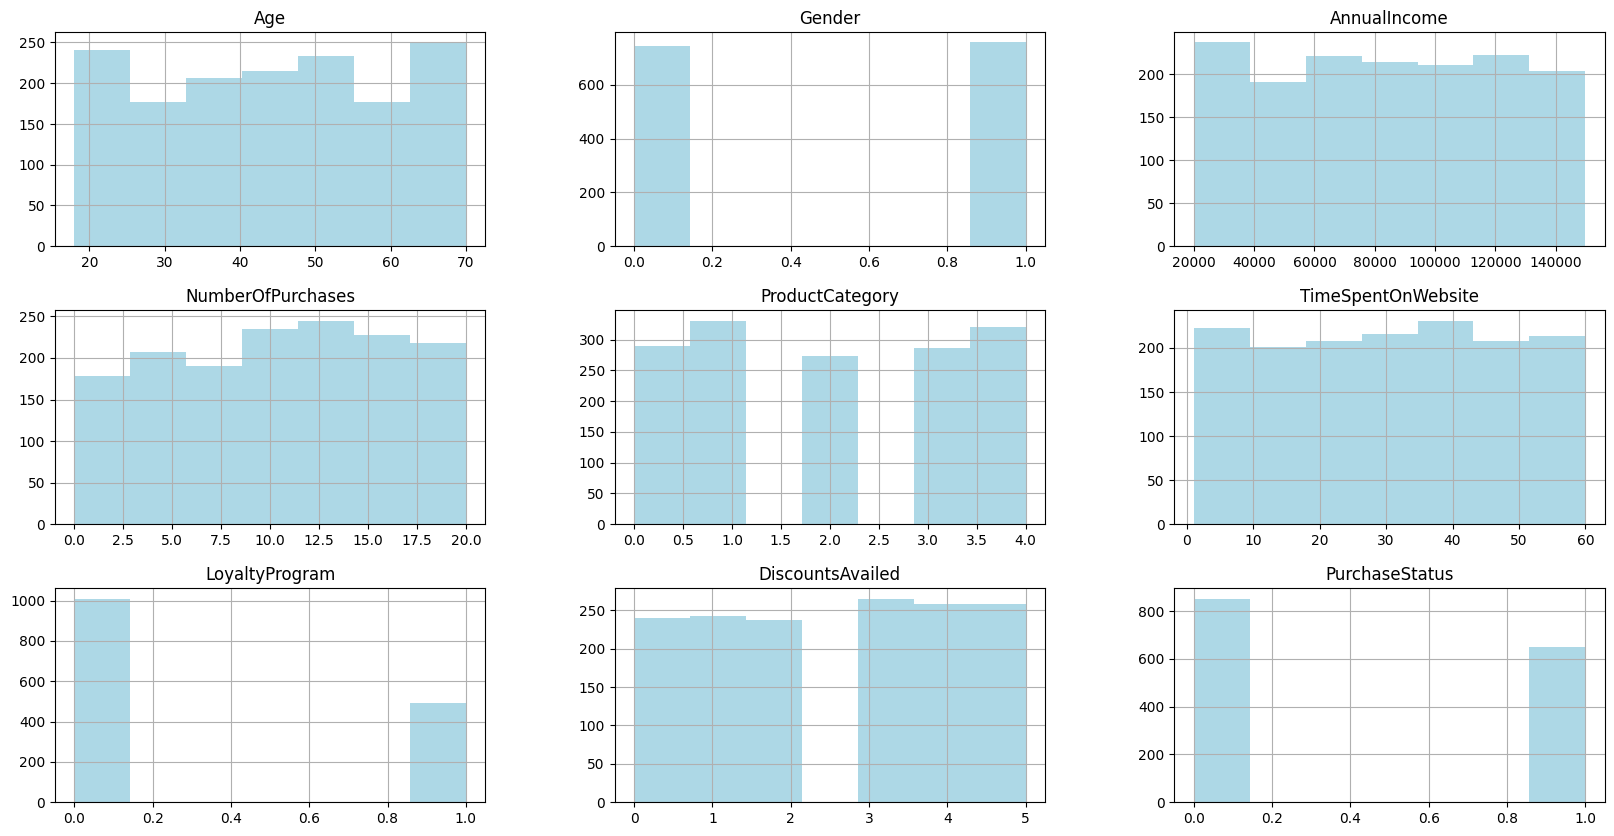

In [9]:
dataset.hist(figsize=(20,10),bins=7, color='lightblue')

In [5]:
X=dataset.drop('PurchaseStatus',axis=1)
y=dataset['PurchaseStatus']
X.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [8]:
X=X.values
print(X)
y=y.values

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:,4].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:4], efc[:,1:],X[:,5:])) #dummy variable removed
print(X)

[[4.00000000e+01 1.00000000e+00 6.61202679e+04 ... 3.05686012e+01
  0.00000000e+00 5.00000000e+00]
 [2.00000000e+01 1.00000000e+00 2.35797736e+04 ... 3.82400966e+01
  0.00000000e+00 5.00000000e+00]
 [2.70000000e+01 1.00000000e+00 1.27821306e+05 ... 3.16332115e+01
  1.00000000e+00 0.00000000e+00]
 ...
 [4.00000000e+01 1.00000000e+00 5.73632475e+04 ... 1.22060332e+01
  0.00000000e+00 0.00000000e+00]
 [6.30000000e+01 0.00000000e+00 1.34021776e+05 ... 3.73116338e+01
  1.00000000e+00 0.00000000e+00]
 [5.00000000e+01 0.00000000e+00 5.26256660e+04 ... 2.53480167e+01
  1.00000000e+00 4.00000000e+00]]


In [11]:
print(X[:3,:])

[[4.00000000e+01 1.00000000e+00 6.61202679e+04 8.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.05686012e+01 0.00000000e+00 5.00000000e+00]
 [2.00000000e+01 1.00000000e+00 2.35797736e+04 4.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  3.82400966e+01 0.00000000e+00 5.00000000e+00]
 [2.70000000e+01 1.00000000e+00 1.27821306e+05 1.10000000e+01
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  3.16332115e+01 1.00000000e+00 0.00000000e+00]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)


In [14]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [20]:
# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 10, kernel_initializer = 'uniform', activation= 'relu', input_dim=11))
#classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())

# adding second layer
classifier.add(Dense(units= 10, kernel_initializer = 'uniform', activation= 'relu'))
#classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())

# adding second layer
classifier.add(Dense(units= 10, kernel_initializer = 'uniform', activation= 'relu'))
#classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())

# adding second layer
classifier.add(Dense(units= 10, kernel_initializer = 'uniform', activation= 'relu'))
#classifier.add(Dropout(0.3))
#classifier.add(BatchNormalization())



#adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation= 'sigmoid'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=5, epochs= 200,validation_split=0.15)

Epoch 1/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5813 - loss: 0.6904 - val_accuracy: 0.5667 - val_loss: 0.6034
Epoch 2/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 0.5523 - val_accuracy: 0.8056 - val_loss: 0.4956
Epoch 3/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4743 - val_accuracy: 0.8222 - val_loss: 0.4351
Epoch 4/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4302 - val_accuracy: 0.8000 - val_loss: 0.4207
Epoch 5/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.4123 - val_accuracy: 0.8056 - val_loss: 0.4205
Epoch 6/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3936 - val_accuracy: 0.8444 - val_loss: 0.4128
Epoch 7/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.3849 - val_accuracy: 0.8222 - val_loss: 0.4124
Epoch 8/200
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4419 - val_accu

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[149  14]
 [ 31 106]]


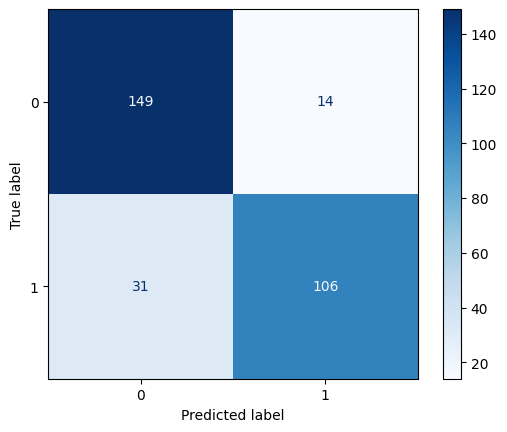

In [21]:
y_pred = classifier.predict(X_test)
y_pred=y_pred>0.5


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()